# ИССЛЕДОВАНИЕ КОМПЬЮТЕРНЫХ ИГР

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


План исследования:
 1. Изучение общей информации в файле.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Составление портрета пользователя каждого региона.
 5. Проверка гипотез.
 6. Общие выводы.

## Изучение общей информации в файле.

Откроем файл с данными и посмотрим общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

In [2]:
games = pd.read_csv('C:/Users/Anna/Desktop/Обучение/Аналитика Яндекс Практикум/Датасеты/games.csv')
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В таблице 11 столбцов. 
Согласно документации к данным:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод:

После просмотра основной информации можно сделать вывод, что необходимо привести все названия столбцов к единому регистру, а также заменить тип данных в столбце Year_of_release на integer, а User_Score - на float64.
Есть несколько столбцов с пропусками, нужно разобраться, какие из них надо заменить и чем.
Чтобы двигаться дальше, нужно устранить проблемы в данных.

##  Предобработка данных

Посмотрим на названия всех колонок.

In [5]:
games.columns # перечень названий столбцов таблицы

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Переведём для удобства названия столбцов к нижнему регистру.

In [6]:
games = (games.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 
                              'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales',
                               'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}))
 # переименование столбцов

In [7]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь названия столбцов записаны в нижнем регистре.
Проверим, сколько пропущенных значений в каждом столбце.

In [8]:
games.isna().sum() #посчитаем долю пропусков в каждом столбце.

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
for column in games:
    print(column, round((games[column].isna().sum() / 16715), 2))


name 0.0
platform 0.0
year_of_release 0.02
genre 0.0
na_sales 0.0
eu_sales 0.0
jp_sales 0.0
other_sales 0.0
critic_score 0.51
user_score 0.4
rating 0.4


In [10]:
games.shape

(16715, 11)

В колонках с названием игры и жанром всего по два пропуска, а в столбце с годом выпуска пропусков всего 2%.
Можно удалить эти строки.

In [11]:
games.dropna(subset = ['name', 'year_of_release', 'genre'],inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [12]:
games.shape

(16444, 11)

Оценки и рейтинг оставим пока без изменений, т.к. количество строк с пропусками слишком большое, а заменить их какими-то данными невозможно.

Поменяем тип данных в столбце year_of_release на integer.

In [13]:
games['year_of_release'] = games['year_of_release'].apply('int64') 
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Посмотрим столбец user_score - оценки пользователей.

In [14]:
print(games['user_score'].nunique())
games['user_score'].unique()

96


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Посмотрим, что за строки, в которых рейтинг равен tbd.

In [15]:
games_tbd = games[games['user_score'] == "tbd"]
games_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Информация в интернете говорит, что tbd - To Be Determined, то есть рейтинг не определен.
Посмотрим, сколько таких строк.

In [16]:
games_tbd.count()

name               2376
platform           2376
year_of_release    2376
genre              2376
na_sales           2376
eu_sales           2376
jp_sales           2376
other_sales        2376
critic_score       1056
user_score         2376
rating             2326
dtype: int64

Такие строки также можно заменить на NaN.

In [17]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan

In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [19]:
print(games['user_score'].nunique())
games['user_score'].unique()

95


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Заменим тип данных в столбце с оценками пользователей.

In [20]:
games['user_score'] = games['user_score'].apply(float) 
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Проверим таблицу на наличие строк-дубликатов.

In [21]:
games.duplicated().sum()

0

Явных дубликатов нет.
Приведем все названия игр к нижнему регистру, чтобы избавиться от дубликатов, если они там есть из-за написания разным регистром.

In [22]:
games['name'] = games['name'].str.lower()
games['name'].nunique()

11426

Посмотрим на значения в столбце с названием платформ.

In [23]:
print(games['platform'].nunique())
games['platform'].unique()

31


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Здесь всё в порядке.
Посмотрим столбец с названиями жанров.

In [24]:
print(games['genre'].nunique())
games['genre'].unique()

12


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Жанров тоже мало, сразу видно, что неявных дубликатов нет.

Теперь посмотрим на значения в столбцах с оценками и рейтингом.

In [25]:
print(games['critic_score'].nunique())
games['critic_score'].unique()

81


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Посмотрим на столбец с рейтингом.

In [26]:
print(games['rating'].nunique())
games['rating'].unique()

8


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
games['rating'] = games['rating'].fillna('no_rating')



In [28]:
games['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Тут всё в порядке.

Далее посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [29]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [30]:
games.head(10) #проверим, что столбец появился

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31


### Вывод

В ходе предобработки данных названия столбцов были приведены к нижнему регистру, тип данных в столбце с годом выпука заменен на целочисленный, удалены строки с пустыми значениями, а странное значение tbd заменено на пропуск.
Также был создан столбец с суммой всех продаж по регионам. 

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Для этого сгруппируем таблицу по году выпуска и посчитаем количество в каждом году.

In [31]:
games_year = games.groupby(['year_of_release']).agg({'name':'count'})
games_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построим график, чтобы посмотреть, как росло количество выпущенных игр с годами.

Text(0.5, 1.05, 'Выпуск игр по годам')

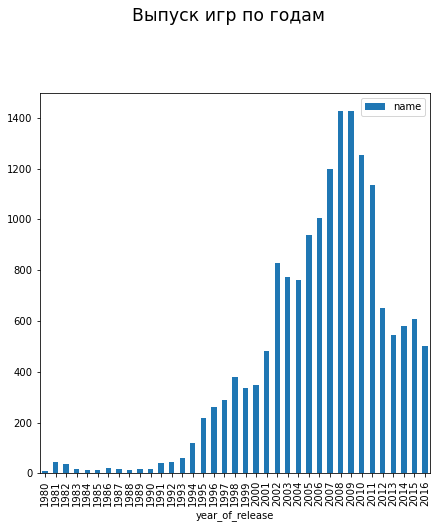

In [32]:
games_year.plot(y='name', kind='bar', figsize=(7, 7))
plt.suptitle('Выпуск игр по годам', x=0.5, y=1.05, ha='center', fontsize='xx-large')

Видно, что до 1993 года выпускалось мало игр, далее количество новых игр с годами стало расти быстрее, пик пришелся на 2007-2011 годы, далее количество вновь выпущенных игр стало снижаться.
Для дальнейшего анализа можно взять период с 2011 по 2016 год, т.к. в эти годы количество выпущенных игр колебалось не так сильно, как в предыдущие годы.

Выведем топ-15 платформ по продажам.

In [33]:
games_platform = games.groupby(['platform']).agg({'total_sales': 'sum'}, ascending=False)
games_platform = games_platform.sort_values(['total_sales'],ascending=False).head(15)
games_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Видно, что в лидерах - первые 6 платформ, дальше разрыв по суммарным продажам уже большой, поэтому можем проанализировать продажи по годам по первым шести платформам.

In [34]:
games_platform = games_platform.head(6)

In [35]:
platform_yaers = games.query('platform in @games_platform.index')
platform_yaers

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,mezase!! tsuri master ds,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16704,plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,score international baja 1000: the official game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,no_rating,0.00
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01


Text(0.5, 1.0, 'Распределение продаж разных платформ по годам')

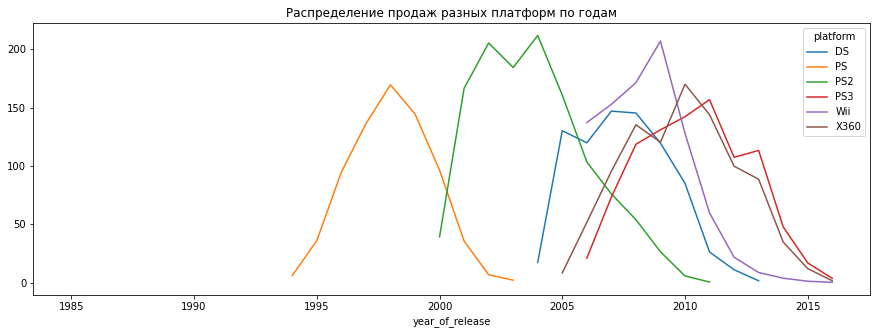

In [36]:
platform_list = platform_yaers['platform'].unique()
games.query('platform in @platform_list').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5))
plt.title('Распределение продаж разных платформ по годам')

На графике хорошо виден срок жизни каждой платформы. В начале выпуска платформы продажи игр растут, достигают пика, дальше падают. На примере PlayStation заметно, что когда выходит обновленная версия платформы, продажи игр для старой версии падают в той же динамике, что и падали до выхода. Новая платформа выходит каждый раз, когда продажи по старой падают до определенного уровня.
Срок жизни каждой платформы - около 10 лет.
Проверим это предположение, посчитав средний срок жизни платформы и медиану.

In [37]:
platform_lifetime = games.pivot_table(index='platform', values='year_of_release', aggfunc=[min, max])
platform_lifetime.columns = ['beginnig', 'end']
platform_lifetime['duration'] = platform_lifetime['end'] - platform_lifetime['beginnig']
print(platform_lifetime['duration'].mean())
platform_lifetime['duration'].median()

7.612903225806452


6.0

 Получается, что в среднем платформы существуют 6-7 лет.

Как уже было сказано выше, для дальнейшего анализа возьмем период с 2011 по 2016 год.

In [38]:
games_actual = games.query('year_of_release >= 2014')
games_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01


Посмотрим, какие платформы лидируют по продажам в этом периоде:

In [39]:
games_actual_sum = (games_actual
                          .pivot_table(index='platform', values='total_sales', aggfunc=sum)
                          .sort_values(by='total_sales', ascending=False)
                         )
games_actual_sum

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


In [40]:
games_actual_sum.nunique()

total_sales    10
dtype: int64

Построим график, чтобы посмотреть, как за нужный нам период росли и падали продажи по платформам.

Text(0.5, 1.0, 'Распределение продаж разных платформ по годам')

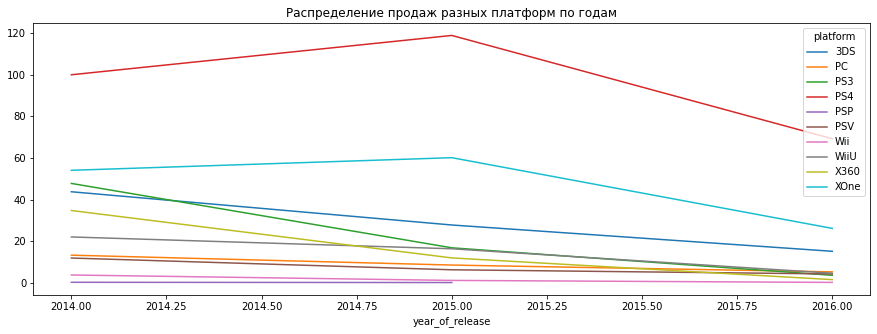

In [41]:
platform_list_new = games_actual['platform'].unique()

games_actual.query('platform in @platform_list_new').pivot_table(
    index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5))

plt.title('Распределение продаж разных платформ по годам')

На графике видно, что не у всех платформ есть игры с релизом после 2015 года, то есть они уже закончили свою жизнь, в анализе их можно не учитывать. Выясним, на каких платформах не было новых релизов игр.

In [42]:
platform_lifetime_new = games_actual.pivot_table(index='platform', values='year_of_release', aggfunc=[min, max])
platform_lifetime_new.columns = ['beginnig', 'end']
platform_lifetime_new

,beginnig,end
platform,,
3DS,2014,2016
PC,2014,2016
PS3,2014,2016
PS4,2014,2016
PSP,2014,2015
PSV,2014,2016
Wii,2014,2016
WiiU,2014,2016
X360,2014,2016


Делаем вывод, что платформу PSP можно не учитывать.

In [43]:
actual_platform_list = ['3DS', 'PC', 'PS3','PS4', 'X360', 'XOne', 'WiiU',  'PSV', 'Wii']

In [44]:
#перезапишем таблицу, учитывая только нужные нам платформы
games_actual = games_actual.query('platform in @actual_platform_list')
games_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01


In [45]:
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1676 non-null   object 
 1   platform         1676 non-null   object 
 2   year_of_release  1676 non-null   int64  
 3   genre            1676 non-null   object 
 4   na_sales         1676 non-null   float64
 5   eu_sales         1676 non-null   float64
 6   jp_sales         1676 non-null   float64
 7   other_sales      1676 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1676 non-null   object 
 11  total_sales      1676 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 170.2+ KB


Построим диаграммы размаха по продажам на оставшихся платформах.

(0.0, 2.5)

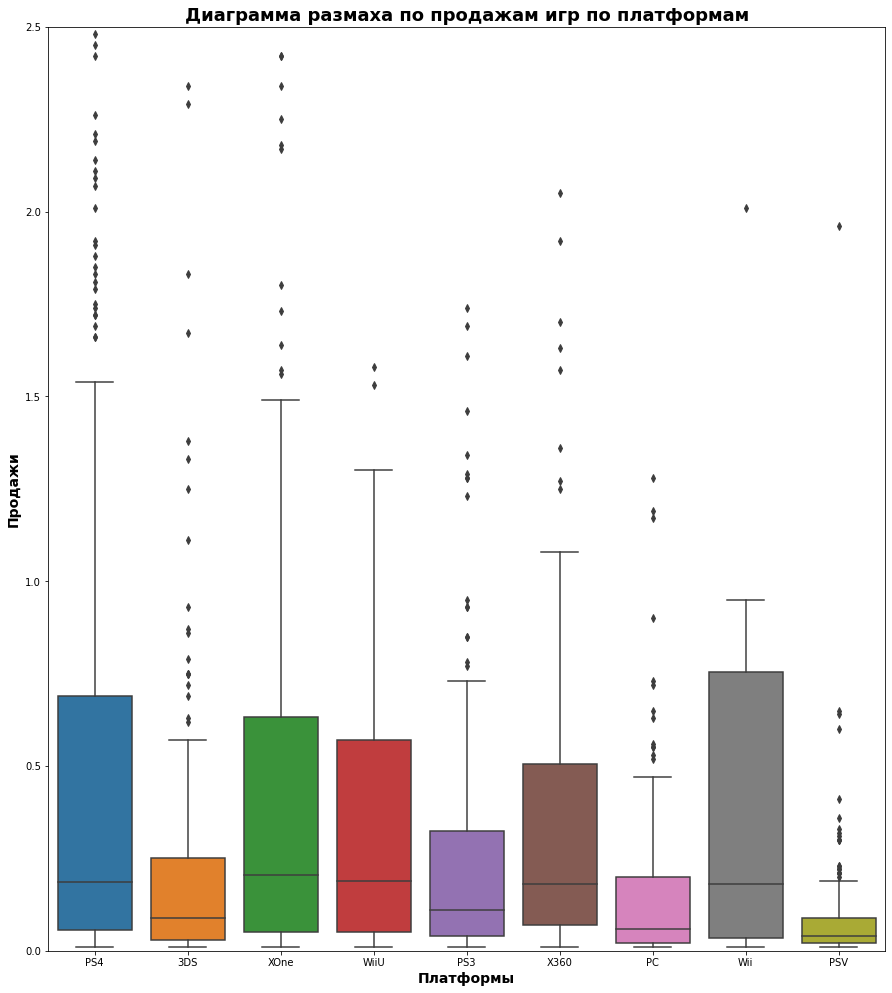

In [46]:
plt.figure(figsize=(15,17))
sns.boxplot(data=games_actual, x='platform', y='total_sales')

plt.title(label='Диаграмма размаха по продажам игр по платформам', fontsize=18, fontweight="bold")
plt.xlabel("Платформы", fontsize=14, fontweight="bold")
plt.ylabel("Продажи", fontsize=14, fontweight="bold")
plt.ylim(0, 2.5)

Из графика можно сделать вывод, что в выделенный период времени по продажам игр лидировали платформы X360, PS3, PS4, XOne, WiiU, а меньше всего продаж было на платформах PSV и PC.

Чтобы посмотреть ависимость продаж от оценок критиков и пользователей, выберем несколько популярных и потенциально прибыльных платформ и посмотрим, как продажи на этих платформах зависят от оценок.

In [47]:
print('Корреляция между продажами и оценками критиков')
games_x360 = games_actual[games_actual['platform']=='X360']
print(round(games_x360['critic_score'].corr(games_x360['total_sales']), 2))

games_ps3 = games_actual[games_actual['platform']=='PS3']
print(round(games_ps3['critic_score'].corr(games_ps3['total_sales']), 2))

games_ps4 = games_actual[games_actual['platform']=='PS4']
print(round(games_ps4['critic_score'].corr(games_ps4['total_sales']), 2))

games_xone = games_actual[games_actual['platform']=='XOne']
print(round(games_xone['critic_score'].corr(games_xone['total_sales']), 2))

print(' ')
print('Корреляция между продажами и оценками пользователей')
games_x360 = games_actual[games_actual['platform']=='X360']
print(round(games_x360['user_score'].corr(games_x360['total_sales']), 2))

games_ps3 = games_actual[games_actual['platform']=='PS3']
print(round(games_ps3['user_score'].corr(games_ps3['total_sales']), 2))

games_ps4 = games_actual[games_actual['platform']=='PS4']
print(round(games_ps4['user_score'].corr(games_ps4['total_sales']), 2))

games_xone = games_actual[games_actual['platform']=='XOne']
print(round(games_xone['user_score'].corr(games_xone['total_sales']), 2))

Корреляция между продажами и оценками критиков
0.53
0.45
0.4
0.43
 
Корреляция между продажами и оценками пользователей
-0.14
-0.17
-0.04
-0.07


Как мы видим, наблюдается слабая положительная зависимость продаж от оценок критиков. Чем выше оценка - тем больше продажи.
А вот от оценок пользователей продажи практически не зависят.
Построим диаграмму рассеяния по всем выбранным платформам, чтобы увидеть зависимость или ее отсутствие наглядно.

Text(0.5, 1.05, 'Зависимость продаж от оценок пользователей')

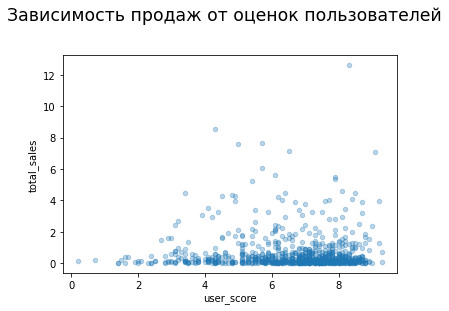

In [48]:
games_actual.plot(kind = 'scatter', y = 'total_sales', x = 'user_score', alpha = 0.3)
plt.suptitle('Зависимость продаж от оценок пользователей', x=0.5, y=1.05, ha='center', fontsize='xx-large')

Text(0.5, 1.05, 'Зависимость продаж от оценок критиков')

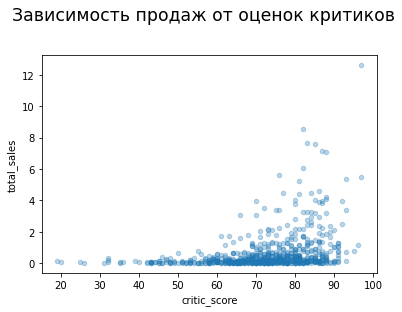

In [49]:
games_actual.plot(kind = 'scatter', y = 'total_sales', x = 'critic_score', alpha = 0.3)
plt.suptitle('Зависимость продаж от оценок критиков', x=0.5, y=1.05, ha='center', fontsize='xx-large')

По графикам тоже видно, что зависимость слабая, но всё же рост продаж встречается чаще у игр с высокими оценками критиков. Но при оценке до 40 продаж мало. А вот у игр с низкими оценками пользователей встречаются и высокие продажи.

Построим график, чтобы посмотреть, игр каких жанров присутствует в таблице больше.

Text(0.5, 1.05, 'Распределение количества игр по жанрам')

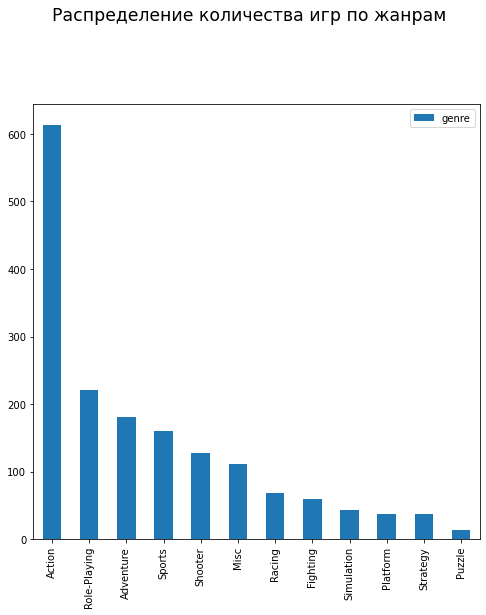

In [50]:
games_actual['genre'].value_counts().plot(kind='bar', figsize=(8, 8), legend=True)
plt.suptitle('Распределение количества игр по жанрам', x=0.5, y=1.05, ha='center', fontsize='xx-large')

С большим отрывом лидирует жанр Action. Теперь посмотрим, как распределяются продажи по играм в зависимости от жанра. 

Text(0.5, 1.05, 'Распределение суммарных продаж игр по жанрам')

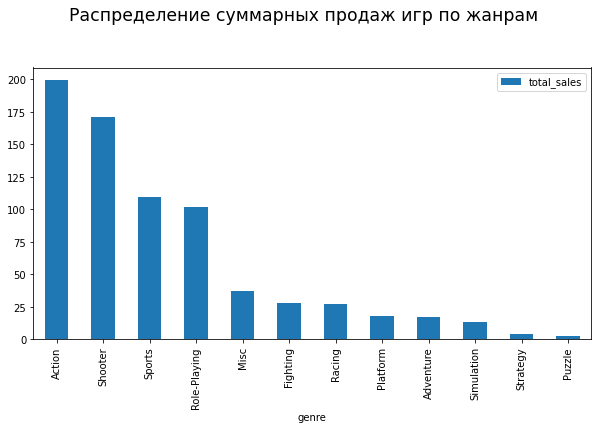

In [51]:
games_actual.pivot_table(index='genre', aggfunc={'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).plot(y='total_sales', kind='bar', figsize=(10, 5))
plt.suptitle('Распределение суммарных продаж игр по жанрам', x=0.5, y=1.05, ha='center', fontsize='xx-large')

Text(0.5, 1.05, 'Распределение медианных продаж игр по жанрам')

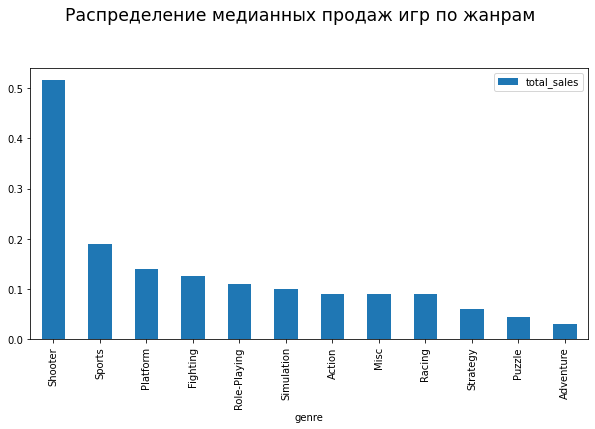

In [52]:
games_actual.pivot_table(index='genre', aggfunc={'total_sales':'median'}).sort_values(by='total_sales', ascending=False).plot(y='total_sales', kind='bar', figsize=(10, 5))
plt.suptitle('Распределение медианных продаж игр по жанрам', x=0.5, y=1.05, ha='center', fontsize='xx-large')

### Вывод

По сумме продаж тоже лидирует жанр Action, но отрыв от других жанров уже не такой значительный.
Но если по количеству в лидерах еще ролевые игры и спорт, то по продажам на второе место выходят "стрелялки", а спорт остается также на третьем месте.
В аутсайдерах - стратегии и головоломки. Получается, игроки больше любят игры на скорость и быстроту реакции, чем те игры, в которых нужно подумать.

Если посмотреть медианные продажи, то картина меняется. В среднем лучше продаются "стрелялки". Игр в жанре Action много в количественном выражении, поэтому и по сумме продажи таких игр оказались больше, чем остальных.

## Составление портрета пользователя каждого региона.
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Сформируем сводную таблицу с сумарными продажами по каждой платформе по регионам.

In [53]:
platforms_region = games_actual.pivot_table(index='platform', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
platforms_region

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30
XOne,46.25,0.32,81.27


Видно, что в разных регионах популярны разные платформы.

Теперь посмотрим на самые популярные жанры по регионам.

In [54]:
genres_region = games_actual.pivot_table(index='genre', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
genres_region

,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.38,72.53
Adventure,6.49,3.55,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.59,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


Посмотрим на графике, как распределяются продажи игр по жанрам в разных регионах.

<AxesSubplot:xlabel='genre'>

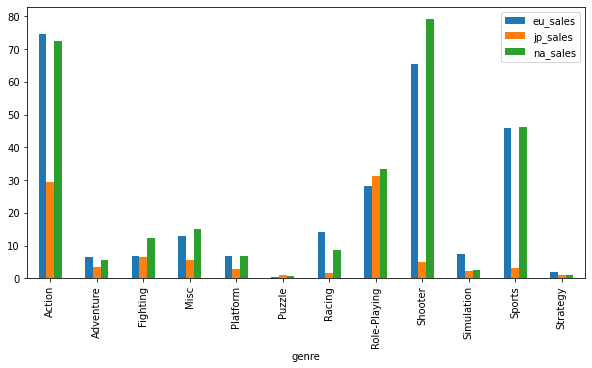

In [55]:
genres_region.plot(kind='bar', figsize=(10, 5))

Выведем топ-5 платформ по регионам.

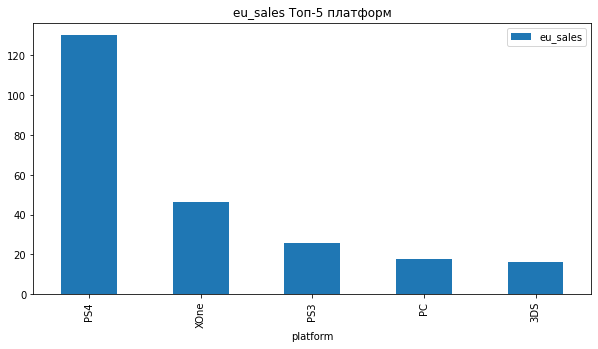

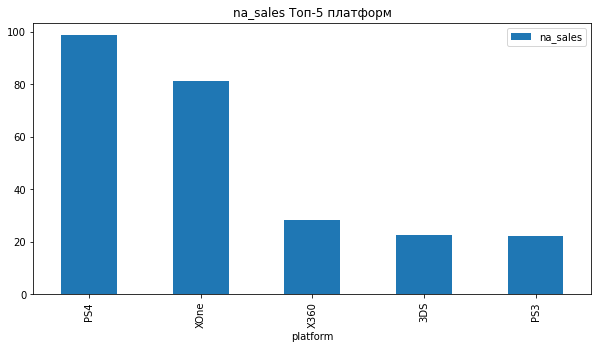

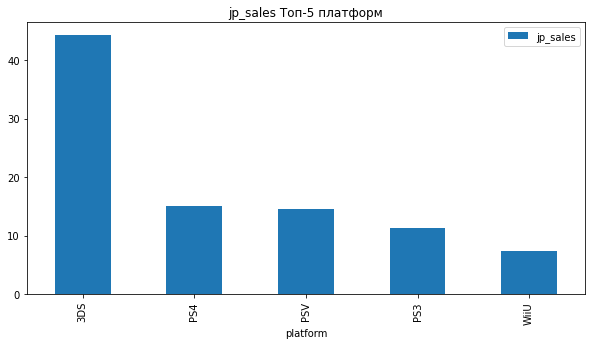

In [56]:
region = ['eu_sales', 'na_sales', 'jp_sales']

for i in range(0, 3):
    platforms_region.nlargest(5, columns=region[i]).plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+' Топ-5 платформ')
    

Таким же образом выведем топ-5 жанров по регионам.

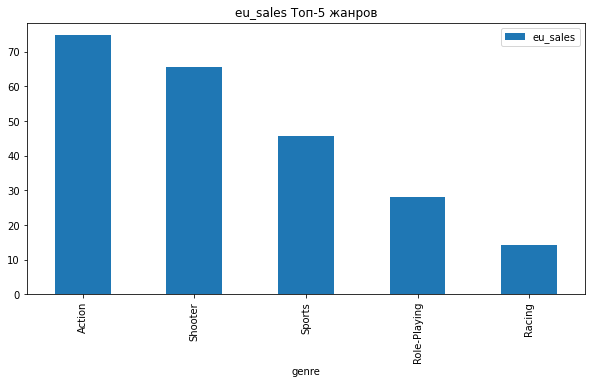

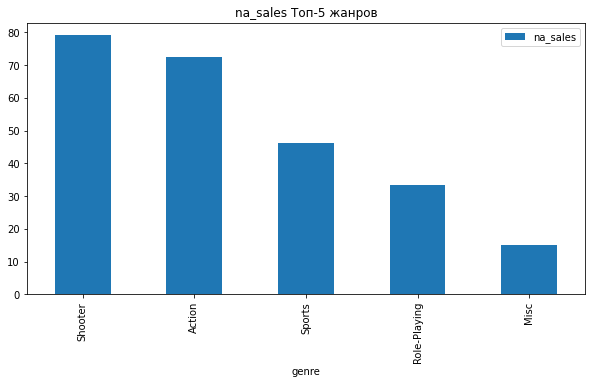

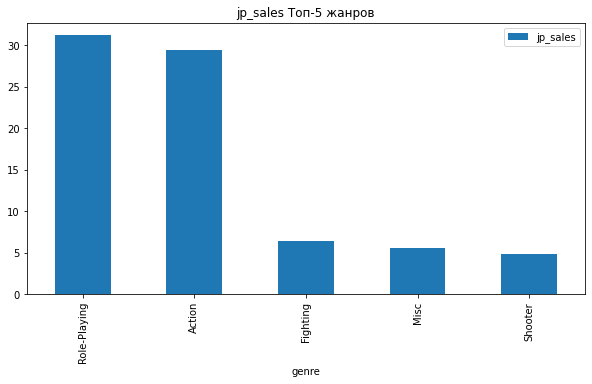

In [57]:
region = ['eu_sales', 'na_sales', 'jp_sales']

for i in range(0, 3):
    genres_region.nlargest(5, columns=region[i]).plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+' Топ-5 жанров')
    

Теперь проверим, как влияет рейтинг на продажи в разных регионах

In [58]:
rating_region = games_actual.pivot_table(index='rating', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
rating_region

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
no_rating,58.95,56.54,64.72


Википедия помогает нам расшифровать обозначения в рейтинге:
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «M» («Mature») — «Для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «T» («Teen») — «Подросткам»

В Европе и Америке больше покупают игры для взрослых. Игры без рейтинга - на втором месте. Затем в лидерах - игры для всех.
А в Японии рейтинг не очень важен. Хорошо продаются игры без рейтинга, далее игры для для подростков.

### Вывод

В Европе самые популярные платформы -  PS4, Xone, PS3. Самые популярные жанры - Action, Shooter, Sport. Причем по количеству лидирует жанр Action, а по средним продажам - Shooter. Топ рейтингов - для взрослых, для всех, для подростков. Ни игры без рейтинга тоже продаются хорошо. Далеко не у всех игр имеется рейтинг. 
В Америке популярны платформы PS4, Xone, X360. Любимые жанры совпадают с Европой - Action, Shooter, Sport. Топ рейтингов также полностью совпадает с Европой.
В Японии картина немного другая. Самые популярные платформы - 3DS, PS4, PSV, а любимые жанры - Role-Playing, Action, Fighting.
Топ рейтингов - для всех, для подростков, и только потом уже - для взрослых.

## Проверка гипотез



Сначала сравним пользовательские рейтинки платформ Xbox One и PC.
Сформулируем нулевую и альтернативную гипотезы:

- H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1 - средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC

In [59]:
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1676 non-null   object 
 1   platform         1676 non-null   object 
 2   year_of_release  1676 non-null   int64  
 3   genre            1676 non-null   object 
 4   na_sales         1676 non-null   float64
 5   eu_sales         1676 non-null   float64
 6   jp_sales         1676 non-null   float64
 7   other_sales      1676 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1676 non-null   object 
 11  total_sales      1676 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 170.2+ KB


In [60]:
games_actual.dropna(subset = ['user_score'],inplace=True) #удалим строки с пустыми значениями 'user_score'

C:\Users\Anna\AppData\Local\Temp\ipykernel_16828\2110577788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_actual.dropna(subset = ['user_score'],inplace=True) #удалим строки с пустыми значениями 'user_score'


In [61]:
games_actual.info() #проверим, что строки удалены

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             888 non-null    object 
 1   platform         888 non-null    object 
 2   year_of_release  888 non-null    int64  
 3   genre            888 non-null    object 
 4   na_sales         888 non-null    float64
 5   eu_sales         888 non-null    float64
 6   jp_sales         888 non-null    float64
 7   other_sales      888 non-null    float64
 8   critic_score     704 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           888 non-null    object 
 11  total_sales      888 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 90.2+ KB


Сначала сформируем две таблицы, выделив нужные нам платформы.

In [67]:
xone_rating = games_actual[(games_actual['platform']=='XOne')]['user_score']
pc_rating = games_actual[(games_actual['platform']=='PC')]['user_score']


Посчитаем дисперсию, чтобы понимать, есть ли разница между дисперсиями в двух выборках.

In [68]:
xone_rating_var = np.var(xone_rating, ddof=1)
xone_rating_var

1.8910066518846989

In [69]:
pc_var = np.var(pc_rating, ddof=1)
pc_var

2.9011543151334522

Дисперсии сильно различаются, поэтому параметр equal_var зададим False.
Выполним проверку гипотезы с помощью ttest_ind.

In [70]:
alpha = .05

results = st.ttest_ind(xone_rating, pc_rating, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Поскольку нулевую гипотезу отвергнуть не удалось, будем считать, что редние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Переходим к проверке второй гипотезы.
- Н0 - Средние пользовательские рейтинги жанров Action  и Sports  одинаковые.
- H1 - Средние пользовательские рейтинги жанров Action  и Sports  различаются.

In [71]:
action_test = games_actual[(games_actual['genre']=='Action')]['user_score']
sports_test = games_actual[(games_actual['genre']=='Sports')]['user_score']

In [72]:
action_test_var = np.var(action_test, ddof=1)
action_test_var

1.898476658476659

In [73]:
sports_test_var = np.var(sports_test, ddof=1)
sports_test_var

3.4469791276090476

Дисперсии сильно различаются, поэтому параметр equal_var зададим False. Выполним проверку гипотезы с помощью ttest_ind.

In [74]:
alpha = .05

results = st.ttest_ind(action_test, sports_test, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.

## Общий вывод.

В ходе проведения анализа по данным об играх можно сделать следующие выводы:
- Пик выпуска новых игр пришелся на 2007-2011 годы, далее количество вновь выпущенных игр снижается.
В период с 2011 по 2016 год количество выпущенных игр колебалось не так сильно, как в предыдущие годы.
- В среднем платформы существуют 6-7 лет.
- В последние годы по продажам игр лидировали платформы X360, PS3, PS4, XOne, WiiU, а меньше всего продаж было на платформах PSV и PC.
- Есть слабая положительная зависимость продаж от оценок критиков. Чем выше оценка - тем больше продажи.
А вот от оценок пользователей продажи практически не зависят. 
- По продажам и количеству выпущенных игр лидирует жанр Action. 
Но если по количеству в лидерах еще ролевые игры и спорт, то по продажам на второе место выходят "стрелялки", а спорт остается также на третьем месте. Если рассматривать средние продажи, то стабильно лучше всех продаются игры в жанре Shooter.
В аутсайдерах - стратегии и головоломки. 
- В Европе самые популярные платформы -  PS4, Xone, PS3. Самые популярные жанры - Action, Shooter, Sport. Топ рейтингов - для взрослых, для всех, для подростков. Игры без рейтинга продаются на том же уровне, что и "для всех".
- В Америке популярны платформы PS4, Xone, X360. Любимые жанры совпадают с Европой - Action, Shooter, Sport. Топ рейтингов также полностью совпадает с Европой.
- В Японии картина немного другая. Самые популярные платформы - 3DS, PS4, PSV, а любимые жанры - Role-Playing, Action, Fighting. Лучше всего продаются игры без рейтинга. Игры "для всех" - тоже в топе.
